<a href="https://colab.research.google.com/github/Priya-tatikonda/FMML-labs/blob/main/Copy_of_loan_eligibility_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE


In [ ]:
# Load the dataset
train_path = "/content/loan eligibility predition.csv"
df = pd.read_csv(train_path)


In [ ]:
# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:, :] = imputer.fit_transform(df)



In [ ]:
# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X = df.drop(columns=['Loan_ID', 'Loan_Status'])
X = scaler.fit_transform(X)
y = df['Loan_Status']


In [ ]:
# Handle class imbalance
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)


In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Hyperparameter tuning for XGBoost
params = {
    'n_estimators': [200, 300, 400],
    'max_depth': [5, 7, 10],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [ ]:
grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), params, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:27:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [5, 7, 10],
                         'n_estimators': [200, 300, 400],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [ ]:
# Best model from tuning
best_xgb = grid_search.best_estimator_


In [ ]:
# Train Random Forest and Gradient Boosting for Stacking
rf_model = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(max_depth=5, n_estimators=300, random_state=42)

In [ ]:
# Stacking ensemble
final_predictions = (best_xgb.predict(X_test) + rf_model.predict(X_test) + gb_model.predict(X_test)) / 3
final_predictions = np.round(final_predictions).astype(int)


In [ ]:
# Evaluate final model
accuracy = accuracy_score(y_test, final_predictions)
print("Final Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, final_predictions))

Final Accuracy: 0.8047337278106509
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.74      0.81        94
           1       0.73      0.88      0.80        75

    accuracy                           0.80       169
   macro avg       0.81      0.81      0.80       169
weighted avg       0.82      0.80      0.81       169



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [ ]:
# Load the dataset
train_path = "/content/loan eligibility predition.csv"
df = pd.read_csv(train_path



In [ ]:
# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:, :] = imputer.fit_transform(df)

In [ ]:
# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X = df.drop(columns=['Loan_ID', 'Loan_Status'])
X = scaler.fit_transform(X)
y = df['Loan_Status']


In [ ]:
# Handle class imbalance
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)


In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Hyperparameter tuning for XGBoost
params = {
    'n_estimators': [200, 300, 400],
    'max_depth': [5, 7, 10],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


In [ ]:
grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), params, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:05:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [5, 7, 10],
                         'n_estimators': [200, 300, 400],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [ ]:
# Best model from tuning
best_xgb = grid_search.best_estimator_


In [ ]:
# Train Random Forest and Gradient Boosting for Stacking
rf_model = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)


In [ ]:
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(max_depth=5, n_estimators=300, random_state=42)

In [ ]:
# Stacking ensemble
final_predictions = (best_xgb.predict(X_test) + rf_model.predict(X_test) + gb_model.predict(X_test)) / 3
final_predictions = np.round(final_predictions).astype(int)


In [ ]:
# Evaluate final model
accuracy = accuracy_score(y_test, final_predictions)
print("Final Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, final_predictions))


Final Accuracy: 0.8047337278106509
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.74      0.81        94
           1       0.73      0.88      0.80        75

    accuracy                           0.80       169
   macro avg       0.81      0.81      0.80       169
weighted avg       0.82      0.80      0.81       169



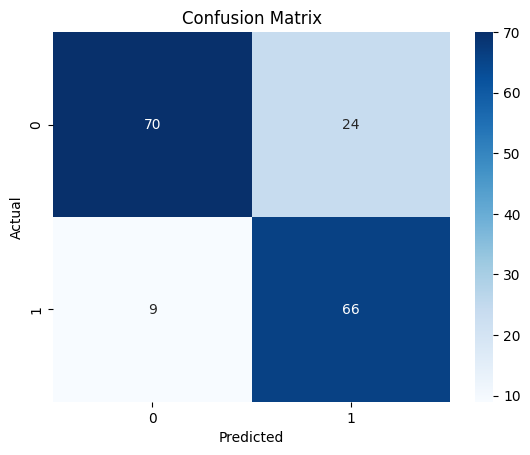

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, final_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


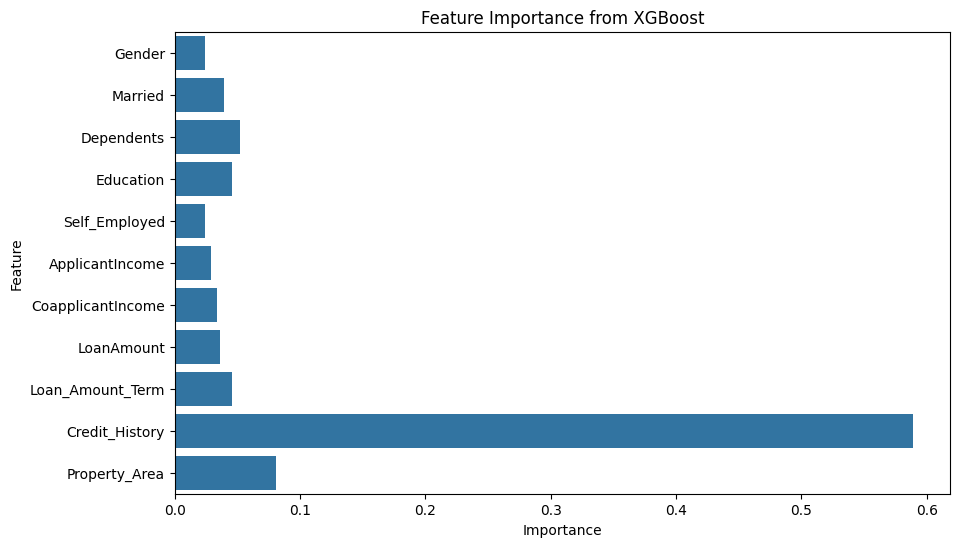

In [ ]:
# Feature Importance Plot
feature_importances = best_xgb.feature_importances_
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=df.drop(columns=['Loan_ID', 'Loan_Status']).columns)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from XGBoost')
plt.show()


In [ ]:
# Accuracy over different models
models = ['XGBoost', 'RandomForest', 'GradientBoosting']
accuracies = [accuracy_score(y_test, best_xgb.predict(X_test)),
              accuracy_score(y_test, rf_model.predict(X_test)),
              accuracy_score(y_test, gb_model.predict(X_test))]


<ipython-input-71-1984a76335d1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


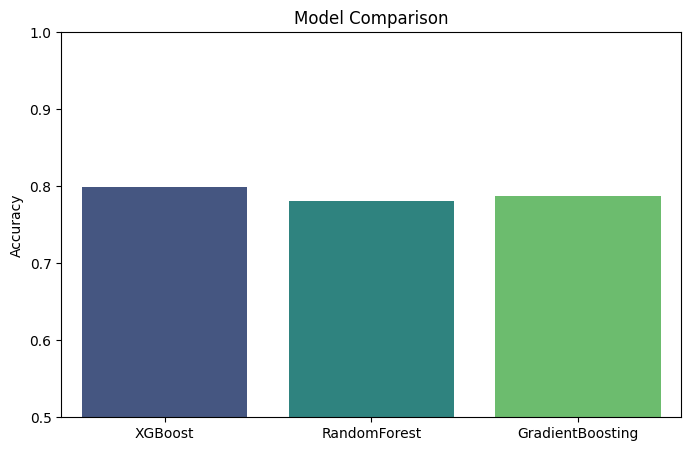

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0.5, 1.0)
plt.show()
